In [ ]:
!pip install -U transformers

Model page: https://huggingface.co/microsoft/table-transformer-structure-recognition

⚠️ If the generated code snippets do not work, please open an issue on either the [model repo](https://huggingface.co/microsoft/table-transformer-structure-recognition)
			and/or on [huggingface.js](https://github.com/huggingface/huggingface.js/blob/main/packages/tasks/src/model-libraries-snippets.ts) 🙏

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("object-detection", model="microsoft/table-transformer-structure-recognition")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for bn1.bias: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pas

preprocessor_config.json:   0%|          | 0.00/274 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
Device set to use cuda:0


In [ ]:
# Load model directly
from transformers import AutoImageProcessor, AutoModelForObjectDetection

processor = AutoImageProcessor.from_pretrained("microsoft/table-transformer-structure-recognition")
model = AutoModelForObjectDetection.from_pretrained("microsoft/table-transformer-structure-recognition")

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Prepare the Image
from PIL import Image
import requests
import torch
# Load image (you can also use a local file path)
image = Image.open("/content/IMG20240814114032.jpg").convert("RGB")


In [ ]:
#Preprocess and Run Inference
# Preprocess the image
inputs = processor(images=image, return_tensors="pt")

# Forward pass (inference)
with torch.no_grad():
    outputs = model(**inputs)


In [ ]:
# Get original image size
width, height = image.size

# Post-process the output to get bounding boxes
results = processor.post_process_object_detection(
    outputs, threshold=0.9, target_sizes=[(height, width)]
)[0]


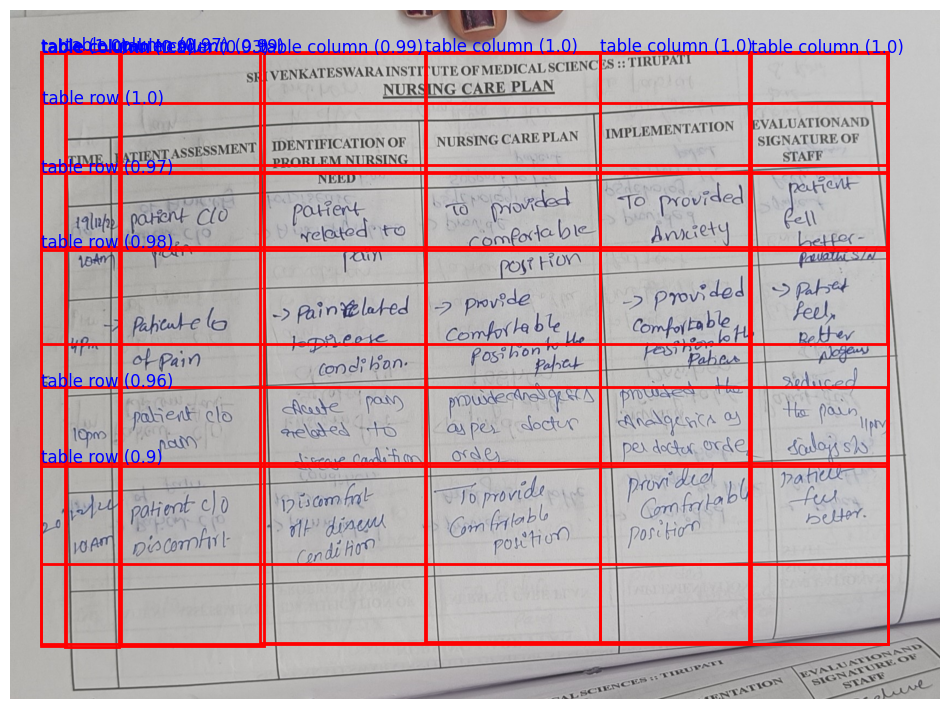

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a plot
plt.figure(figsize=(12, 12))
plt.imshow(image)
ax = plt.gca()

# Loop through detected objects
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    x, y, w, h = box
    ax.add_patch(patches.Rectangle((x, y), w - x, h - y, linewidth=2, edgecolor='red', facecolor='none'))
    label_name = model.config.id2label[label.item()]
    ax.text(x, y, f"{label_name} ({round(score.item(), 2)})", fontsize=12, color='blue')

plt.axis("off")
plt.show()


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for bn1.bias: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pas

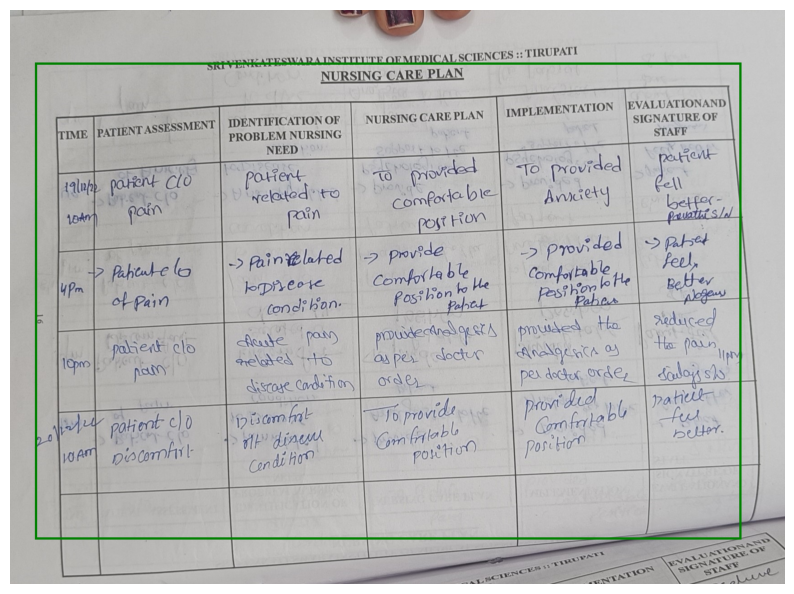

In [ ]:
from PIL import Image, ImageDraw
from transformers import AutoImageProcessor, AutoModelForObjectDetection
import torch
import matplotlib.pyplot as plt

# Load the image
image = Image.open("/content/IMG20240814114032.jpg").convert("RGB")

# Load model
processor = AutoImageProcessor.from_pretrained("microsoft/table-transformer-structure-recognition")
model = AutoModelForObjectDetection.from_pretrained("microsoft/table-transformer-structure-recognition")

# Inference
inputs = processor(images=image, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)

# Post-process
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, threshold=0.8, target_sizes=target_sizes)[0]

# Get all table rows
id2label = model.config.id2label
table_rows = [
    box.tolist()
    for score, label, box in zip(results["scores"], results["labels"], results["boxes"])
    if id2label[label.item()] == "table row"
]

# Bounding box around all table rows
if table_rows:
    x_min = min(box[0] for box in table_rows)
    y_min = min(box[1] for box in table_rows)
    x_max = max(box[2] for box in table_rows)
    y_max = max(box[3] for box in table_rows)

    # Draw rectangle
    draw = ImageDraw.Draw(image)
    draw.rectangle([x_min, y_min, x_max, y_max], outline="green", width=5)

# Show result
plt.figure(figsize=(10, 14))
plt.imshow(image)
plt.axis('off')
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.2/821.2 MB 846.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 352.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 MB 756.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


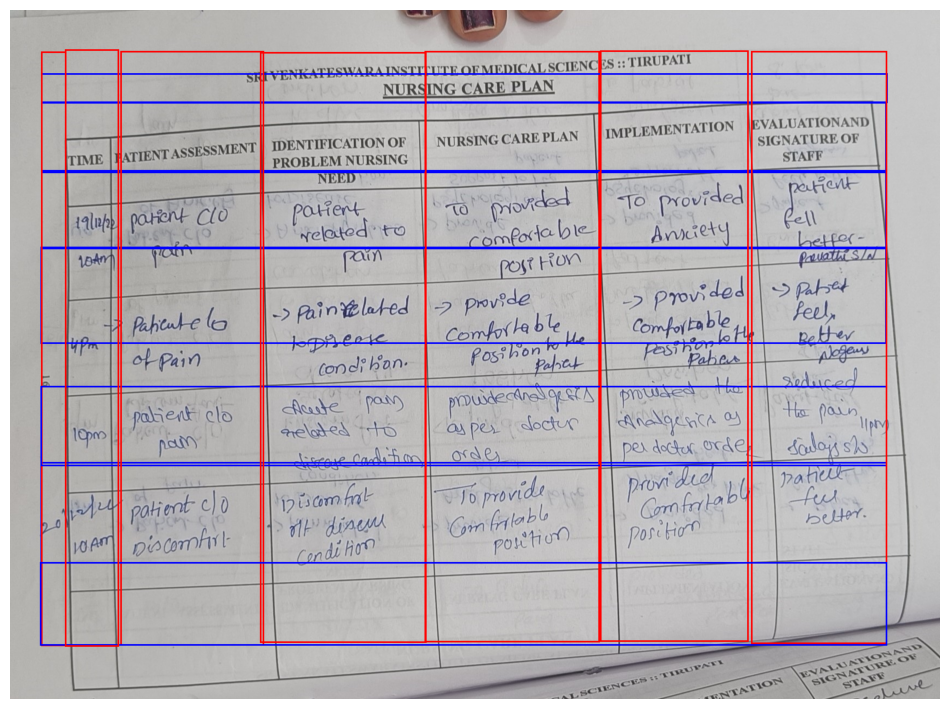

In [ ]:
!pip install -U transformers torch torchvision pillow matplotlib

from PIL import Image, ImageDraw
from transformers import AutoImageProcessor, AutoModelForObjectDetection
import torch
import matplotlib.pyplot as plt

# Load the image
image = Image.open("/content/IMG20240814114032.jpg").convert("RGB")

# Load processor and model
processor = AutoImageProcessor.from_pretrained("microsoft/table-transformer-structure-recognition")
model = AutoModelForObjectDetection.from_pretrained("microsoft/table-transformer-structure-recognition")

# Inference
inputs = processor(images=image, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)

# Post-process
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, threshold=0.8, target_sizes=target_sizes)[0]

# Draw detected rows (blue) and columns (red)
drawn_image = image.copy()
draw = ImageDraw.Draw(drawn_image)
id2label = model.config.id2label

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    label_text = id2label[label.item()]
    if label_text in ["table row", "table column"]:
        box = box.tolist()
        draw.rectangle(box, outline="blue" if label_text == "table row" else "red", width=3)

# Show the final image
plt.figure(figsize=(12, 16))
plt.imshow(drawn_image)
plt.axis("off")
plt.show()


In [ ]:
pip install -U transformers torch torchvision matplotlib opencv-python


Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


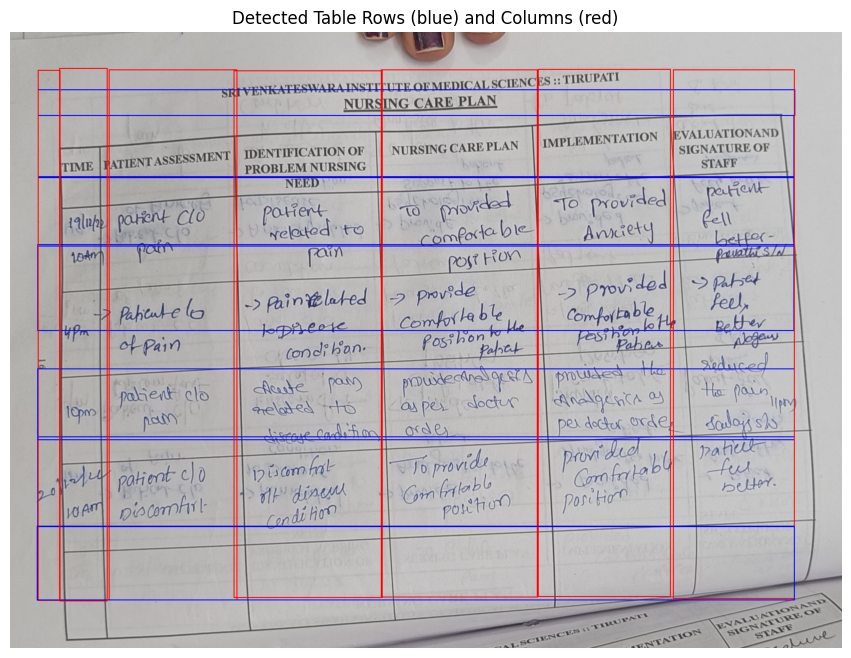

In [ ]:
from PIL import Image, ImageDraw
from transformers import AutoImageProcessor, AutoModelForObjectDetection
import torch
import cv2
import matplotlib.pyplot as plt

# Load image
image_path = "/content/IMG20240814114032.jpg"
image = Image.open(image_path).convert("RGB")

# Load processor and model
processor = AutoImageProcessor.from_pretrained("microsoft/table-transformer-structure-recognition")
model = AutoModelForObjectDetection.from_pretrained("microsoft/table-transformer-structure-recognition")

# Run inference
inputs = processor(images=image, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)

# Post-process output
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, threshold=0.8, target_sizes=target_sizes)[0]
id2label = model.config.id2label

# Create drawing image
draw = ImageDraw.Draw(image)

# Filter only rows and columns and draw
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    label_text = id2label[label.item()]
    if label_text in ["table row", "table column"]:
        box = box.tolist()
        color = "blue" if label_text == "table row" else "red"
        draw.rectangle(box, outline=color, width=2)

# Display final image
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis("off")
plt.title("Detected Table Rows (blue) and Columns (red)")
plt.show()
